# Hands-On Validation and Evaluation Metrics 
***

In this notebook we'll investigate Scikit-Learn's functionality for performing cross-validation, plotting ROC curves, and plotting learning curves. 

**Note**: There are some helper functions at the bottom of this notebook.  Scroll down and execute those cells before continuing. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

### Part 1: Data Examination and Visualization
***

The data we will explore in this notebook is the so-called Spambase data, which contains features extracted from SPAM and HAM emails.  The following cell will load the data. 

In [3]:
data = pd.read_csv("data/spamdata.csv", sep=" ")
X, y = data.values[:,:-1], data.values[:,-1]
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,isSPAM
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


**Part A**: The features in in this dataset are a combination of frequency counts for select words as well as other numerical features derived from the original email text.  Some of the word-count features included are things like 

- `word_freq_order`: percentage of words in the email that are the word `order` 
- `word_freq_free`: percentage of words in the email that are the word `free` 

A few other relevant features are things like 

- `capital_run_length_average`: the average length of a run of capital letters 
- `capital_run_length_longest`: the longest length of a run of capital letters 
- `char_freq_!`: the number of exclamation points that appear in the email 

Descriptions of the rest of the features can be found [here](http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names). 

**Part B**: 

Let's visualize some of the features by plotting histograms of the features colored by whether the email is SPAM or HAM. It seems like the number of contiguous capital letters should be a good indicator of SPAM... 

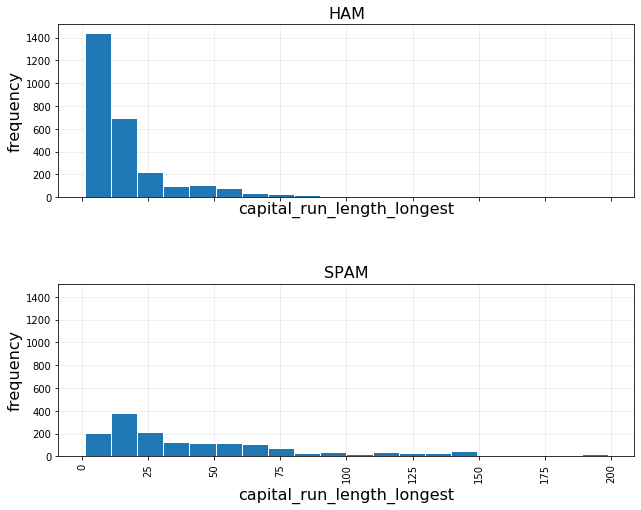

In [4]:
feature_hist(data, "capital_run_length_longest", 200)

And probably also the number of exclamation points ... 

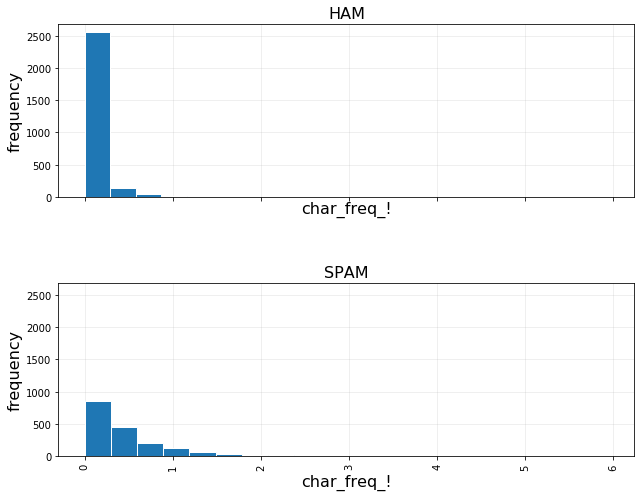

In [5]:
feature_hist(data, "char_freq_!", 6)

### Part 2: Estimating Model Performance with Cross-Validation 
***

In this section we'll use sklearn's built in cross-validation routine to estimate the accuracy of logistic regression for our data set.  

**Part A**: First, let's set a baseline by performing a train-validation split on the data and then fitting a logistic regression model. 

In [6]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1001)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.001)
logreg.fit(X_train, y_train)

/data/anaconda3/envs/teaching/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Next we'll evaluate the error on the validation set and see how well we did. 

In [7]:
mean_test_score =  logreg.score(X_test, y_test) # TODO
print("test accuracy: {:.3f}".format(mean_test_score))

test accuracy: 0.895


**Part B**: Now we will use cross validation to choose the best parameter. Try it now with $k=5$ folds. 

Now let us first run cross validation with default parameter.

In [8]:
from sklearn.model_selection import cross_validate 

scores = cross_validate(LogisticRegression(C=0.1, solver="lbfgs", max_iter=1000), X_train, y_train,
                        return_train_score=True, cv=5) # TODO
mean_train_score = np.mean(scores["train_score"]) # TODO 
mean_test_score = np.mean(scores["test_score"]) # TODO 
print("mean train score: {:.3f} test score: {:.3f}".format(mean_train_score, mean_test_score))

mean train score: 0.925 test score: 0.921


**Part C**: Now let us try different parameters and see which parameter gives the best cross validation score.

/data/anaconda3/envs/teaching/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/data/anaconda3/envs/teaching/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/data/anaconda3/envs/teaching/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/data/anaconda3/envs/teaching/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/data/anaconda3/envs/teaching/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to 

32.0


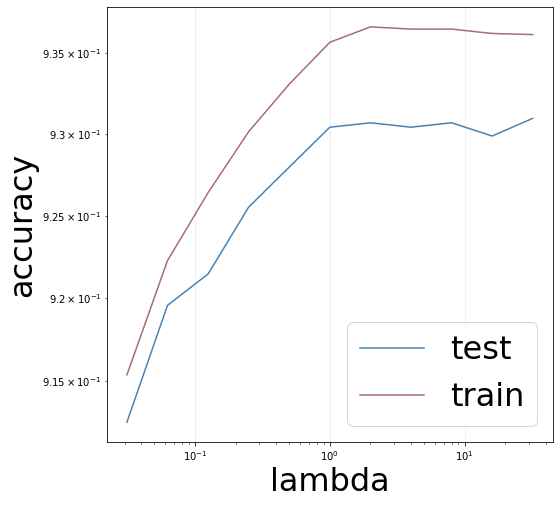

In [10]:
lambdas = np.logspace(5, -5, 11, base=2)
best_score, best_lambda = 0, None
mean_train_scores, mean_test_scores = [], []

# TODO
for c in lambdas:
    # cross validate with difference c
    scores = cross_validate(LogisticRegression(C=c, solver="lbfgs", max_iter=1000), X_train, y_train,
                            return_train_score=True, cv=5)
    mean_train_score = np.mean(scores["train_score"]) 
    mean_test_score = np.mean(scores["test_score"]) 
    # store the mean train score and mean test score
    mean_train_scores.append(mean_train_score)
    mean_test_scores.append(mean_test_score)
    # update best lambda
    if mean_test_score > best_score:
        best_score = mean_test_score
        best_lambda = c

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
ax.loglog(lambdas, mean_test_scores, color=mycolors["blue"])
ax.loglog(lambdas, mean_train_scores, color=mycolors["red"])
ax.grid(alpha=0.25)
ax.set_xlabel("lambda", fontsize=32)
ax.set_ylabel("accuracy", fontsize=32)
ax.legend(["test", "train"], fontsize=32)
print(best_lambda)

**Part D**: Use best lambda to train a classifier and run on the test set.

In [11]:
logreg = LogisticRegression(C=best_lambda)
logreg.fit(X_train, y_train)
print("test accuracy: {:.3f}".format(logreg.score(X_test, y_test)))

test accuracy: 0.922


/data/anaconda3/envs/teaching/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/data/anaconda3/envs/teaching/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Part 3: Evaluating Model Performance with the ROC curve 
***

Note that SPAM classification is an application in which we might want to finely tune the true positive rate and false positive rate of our classifier. 

**Part A**: Think about SPAM classification.  What kinds of classification errors would be the most detrimental? 


Classify important messages as spams

**Part B**: Let's plot a ROC curve for our Logistic Regression classifier. Sklearn's [roc_curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) routine computes the FPR and TPR for a range of possible thresholds in the data which you can then use to plot. Check out the documentation, and then fill in the code below to plot the curve for our Logistic Regression SPAM classifier. 

/data/anaconda3/envs/teaching/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(FPR, TPR) = (0.009, 0.464)


/data/anaconda3/envs/teaching/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


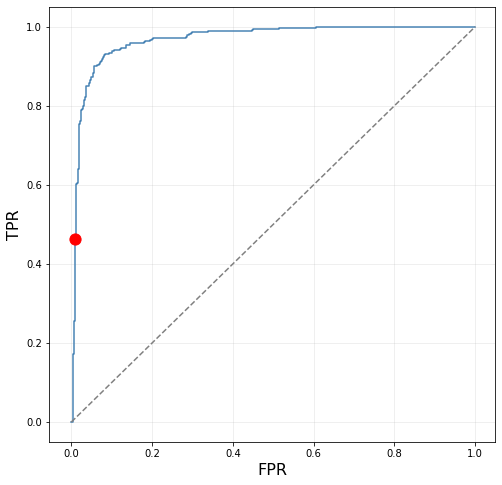

In [13]:
from sklearn.metrics import roc_curve

logreg = LogisticRegression(C=best_lambda) 
logreg.fit(X_train, y_train)
y_test_scores = logreg.predict_proba(X_test)[:,1]

# TODO
FPR, TPR, thresholds = roc_curve(y_test, y_test_scores)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))

# TODO: plot TPR vs FPR
ax.plot(FPR, TPR, color=mycolors["blue"])
ax.plot([0,1],[0,1], ls="--", color="gray")
ax.grid(alpha=0.25)
ax.set_xlabel("FPR", fontsize=16)
ax.set_ylabel("TPR", fontsize=16);

# TODO for Part C: find the TPR for FPR at 0.01
ind = np.where(FPR < 0.01)[0][-1]
ax.scatter([FPR[ind]], [TPR[ind]], color="red", s=125, zorder=3)
print("(FPR, TPR) = ({:.3f}, {:.3f})".format(FPR[ind], TPR[ind]))


**Part C**: Let's suppose you want to use your ROC curve to decide how your model would perform if you fixed highest the false positive rate that you're willing to accept for your classifier.  Modify your code above to overlay a red dot on the ROC curve at your desired FPR level.  What threshold does this correspond to? At this specific FPR, do you think our model is good enough to real-life SPAM classification?  

<br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br>

### Helper Functions
***

In [2]:
mycolors = dict({"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373", "orange": "orange"})

def feature_hist(df, feat, feat_max):
    """
    Function to plot SPAM vs HAM histograms for a given feature 
    
    :param df: the DataFrame 
    :param feat: the feature name 
    :param feat_max: the largest values of feature to plot 
    """
    fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(10,8))
    df.loc[df[feat] < feat_max].hist(column=feat, by="isSPAM", ax=axes, bins=20, edgecolor="white")
    axes[0].set_title("HAM", fontsize=16); axes[1].set_title("SPAM", fontsize=16)
    for ax in axes:
        ax.grid(alpha=0.25)
        ax.set_axisbelow("True")
        ax.set_xlabel(feat, fontsize=16)
        ax.set_ylabel("frequency", fontsize=16)